# 1、分别生成可用于聚类和分类的2D或3D人工数据集，并用教材中matplotlib库的各种用法，发挥想象力，对数据进行各种可视化的显示，比如：直方图统计、密度估计和热力图显示、对某些数据进行图形注释、对数据做变换并投影到某个空间之后做统计并与原图一起显示等。

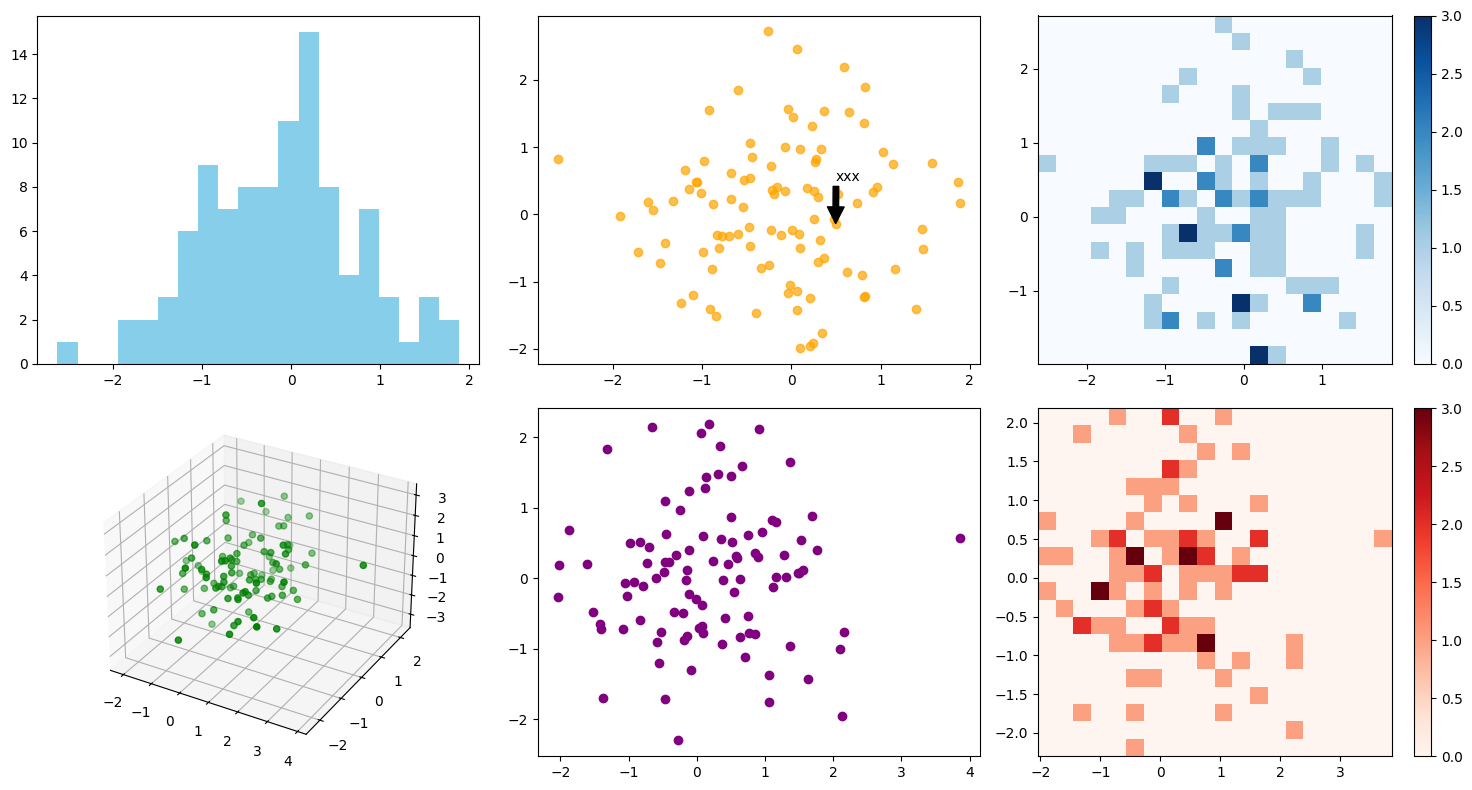

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 生成随机数据
np.random.seed(42)  # 固定随机种子
data_2d = np.random.randn(100, 2)  # 100个2D点
data_3d = np.random.randn(100, 3)  # 100个3D点

# 2. 创建画布
plt.figure(figsize=(15, 8))

# 3. 直方图 (2D数据的x坐标)
plt.subplot(2, 3, 1)
plt.hist(data_2d[:, 0], bins=20, color='skyblue')

# 4. 散点图 (2D数据)
plt.subplot(2, 3, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='orange', alpha=0.7)

plt.annotate('xxx', xy=(data_2d[0, 0], data_2d[0, 1]), 
             xytext=(0.5, 0.5), arrowprops=dict(facecolor='black'))

# 5. 热力图 (2D数据)
plt.subplot(2, 3, 3)
plt.hist2d(data_2d[:, 0], data_2d[:, 1], bins=20, cmap='Blues')
plt.colorbar()

# 6. 3D散点图
ax = plt.subplot(2, 3, 4, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c='green')


# 7. 3D数据投影到2D (简单平均)
plt.subplot(2, 3, 5)
projected_2d = data_3d[:, :2]  # 简单取前两维
plt.scatter(projected_2d[:, 0], projected_2d[:, 1], c='purple')


# 8. 投影后热力图
plt.subplot(2, 3, 6)
plt.hist2d(projected_2d[:, 0], projected_2d[:, 1], bins=20, cmap='Reds')
plt.colorbar()

plt.tight_layout()
plt.show()


# 2、使用题目1中生成的人工数据，不使用库函数，自己编程实现k-means聚类算法。

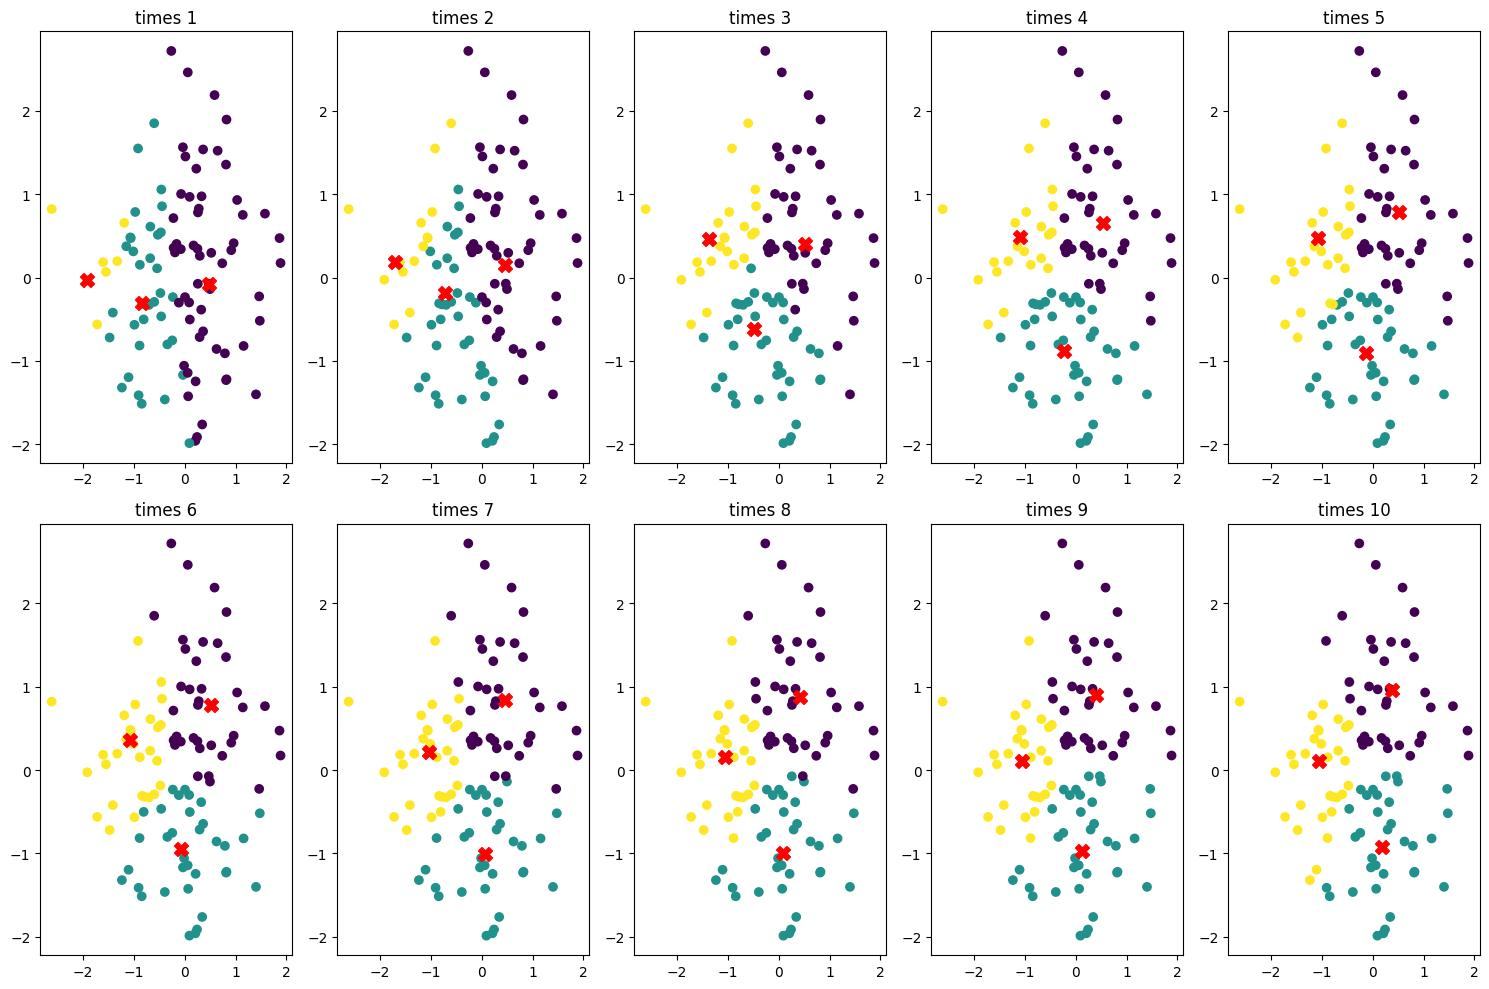

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据
np.random.seed(42)
data = np.random.randn(100, 2)

# 初始化3个随机中心点
k = 3
centroids = data[np.random.choice(100, k, replace=False)]

# 创建画布
plt.figure(figsize=(15, 10))

for iteration in range(10):  # 最多迭代10次
    # 计算每个点到中心点的距离
    distances = np.zeros((100, k))
    for i in range(k):
        distances[:,i] = np.sqrt((data[:,0]-centroids[i,0])**2 + (data[:,1]-centroids[i,1])**2)
    
    # 分配标签（最近的中心点）
    labels = np.argmin(distances, axis=1)
    
    # 绘制当前状态
    plt.subplot(2, 5, iteration+1)
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=100)
    plt.title(f'times {iteration+1}')
    
    # 更新中心点位置
    new_centroids = np.array([data[labels==i].mean(axis=0) for i in range(k)])
    
    # 检查是否收敛
    if np.allclose(centroids, new_centroids):
        break
        
    centroids = new_centroids

plt.tight_layout()
plt.show()


# 3、使用题目1中生成的人工数据，不使用库函数，自己编程实现logistic regression算法。
## 注：使用Newton-Raphson算法做二类分类即可。

迭代1: 权重=[1.27213419 1.21950991], 偏置=-0.24
迭代2: 权重=[2.3057912 2.2511351], 偏置=-0.21
迭代3: 权重=[3.728226   3.65116558], 偏置=-0.19
迭代4: 权重=[5.85667309 5.68462397], 偏置=-0.17
迭代5: 权重=[9.05888961 8.65594072], 偏置=-0.16


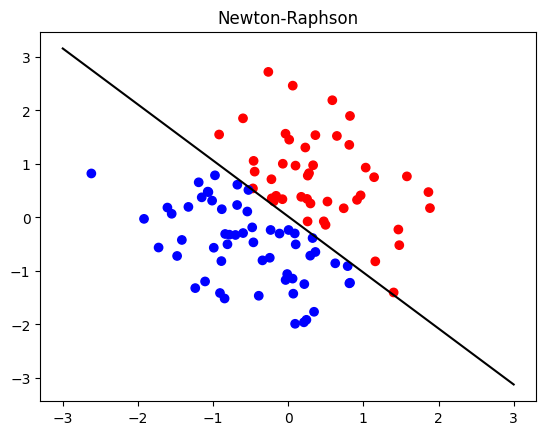

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# 1. 生成数据
np.random.seed(42)
data = np.random.randn(100, 2)  # 100个2D点
labels = (data[:, 0] + data[:, 1] > 0).astype(int)  # 简单线性分割

# 2. 初始化参数
w = np.zeros(2)  # 权重
b = 0            # 偏置

# 3. Newton-Raphson算法 (5次迭代)
for i in range(5):
    # 计算预测概率
    z = np.dot(data, w) + b
    prob = 1 / (1 + np.exp(-z))
    
    # 计算梯度
    error = prob - labels
    grad_w = np.dot(data.T, error)
    grad_b = np.sum(error)
    
    # 计算Hessian
    S = prob * (1 - prob)  # sigmoid导数
    hessian_w = np.dot(data.T * S, data)
    hessian_b = np.sum(S)
    
    # 更新参数
    w -= np.linalg.inv(hessian_w).dot(grad_w)
    b -= grad_b / hessian_b
    
    print(f"迭代{i+1}: 权重={w}, 偏置={b:.2f}")

# 4. 可视化结果
plt.scatter(data[:,0], data[:,1], c=labels, cmap='bwr')
x_line = np.array([-3, 3])
y_line = -(w[0]*x_line + b)/w[1]
plt.plot(x_line, y_line, 'k-')
plt.title('Newton-Raphson')
plt.show()


# 4、销售数据分析

## **题目描述**：
## 给定两个CSV文件：  
## 1. `orders.csv` 包含订单数据（订单ID、产品ID、日期、数量、地区）  
## 2. `products.csv` 包含产品数据（产品ID、类别、单价）  

## **任务要求**：  
## 1. 合并两个表格，计算每个订单的总金额  
## 2. 找出2023年第一季度销售额最高的产品类别  
## 3. 按地区统计每月销售总额，结果格式需包含地区、年月、销售额三列  

In [8]:
import pandas as pd
import numpy as np

# 生成订单数据
orders = pd.DataFrame({
    'order_id': range(1, 1001),
    'product_id': np.random.choice(range(1, 51), 1000),
    'date': pd.date_range('2023-01-01', '2023-03-31').to_series().sample(1000, replace=True).dt.strftime('%Y-%m-%d'),
    'quantity': np.random.randint(1, 10, 1000),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 1000)
})

# 生成产品数据
products = pd.DataFrame({
    'product_id': range(1, 51),
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Books'], 50),
    'unit_price': np.round(np.random.uniform(10, 500, 50), 2)
})

orders.to_csv('orders.csv', index=False)
products.to_csv('products.csv', index=False)

In [9]:

import pandas as pd

# 1. 读取数据
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

# 2. 合并表格并计算订单总金额
merged = pd.merge(orders, products, on='product_id')
merged['total_amount'] = merged['quantity'] * merged['unit_price']

# 3. 找出2023年第一季度销售额最高的产品类别
merged['date'] = pd.to_datetime(merged['date'])
q1_2023 = merged[(merged['date'] >= '2023-01-01') & (merged['date'] <= '2023-03-31')]
top_category = q1_2023.groupby('category')['total_amount'].sum().idxmax()

# 4. 按地区统计每月销售总额
monthly_sales = merged.copy()
monthly_sales['year_month'] = monthly_sales['date'].dt.to_period('M')
result = monthly_sales.groupby(['region', 'year_month'])['total_amount'].sum().reset_index()

print("最高销售额类别:", top_category)
print("\n各地区月度销售额:")
print(result)


最高销售额类别: Books

各地区月度销售额:
   region year_month  total_amount
0    East    2023-01     106958.05
1    East    2023-02      92079.54
2    East    2023-03      95997.59
3   North    2023-01     115627.21
4   North    2023-02     102665.75
5   North    2023-03     106746.41
6   South    2023-01      92176.69
7   South    2023-02      80325.01
8   South    2023-03      83342.20
9    West    2023-01      99652.63
10   West    2023-02      89485.28
11   West    2023-03     117971.93
